# Chapter4 Summarizing data

## Library

In [28]:
library(NHANES)
library(dplyr)
library(magrittr)
library(pander)
library(tidyr)
library(ggplot2)
library(gridExtra)

## 4.2 Summarizing data using tables

### 4.2.1 Frequency distributions

In [121]:
PhysActive_table <- NHANES %>% 
  dplyr::select(PhysActive) %>% 
  group_by(PhysActive) %>% 
  summarize(AbsoluteFrequency = n())

pander(PhysActive_table) 


--------------------------------
 PhysActive   AbsoluteFrequency 
------------ -------------------
     No             3677        

    Yes             4649        

     NA             1674        
--------------------------------



In [8]:
NHANES %>%
  drop_na(PhysActive) %>%
  dplyr::select(PhysActive) %>%
  group_by(PhysActive) %>%
  summarize(AbsoluteFrequency = n()) %>%
  pander()


--------------------------------
 PhysActive   AbsoluteFrequency 
------------ -------------------
     No             3677        

    Yes             4649        
--------------------------------



In [9]:
NHANES %>%
  drop_na(PhysActive) %>%
  dplyr::select(PhysActive) %>%
  group_by(PhysActive) %>%
  summarize(AbsoluteFrequency = n()) %>%
  mutate(RelativeFrequency = AbsoluteFrequency / sum(AbsoluteFrequency)) %>%
  pander()


----------------------------------------------------
 PhysActive   AbsoluteFrequency   RelativeFrequency 
------------ ------------------- -------------------
     No             3677              0.4416286     

    Yes             4649              0.5583714     
----------------------------------------------------



In [10]:
PhysActive_table_filtered <- NHANES %>%
  drop_na(PhysActive) %>%
  dplyr::select(PhysActive) %>%
  group_by(PhysActive) %>%
  summarize(AbsoluteFrequency = n()) %>%
  mutate(
    RelativeFrequency = AbsoluteFrequency / sum(AbsoluteFrequency),
    Percentage = RelativeFrequency * 100
  )

pander(PhysActive_table_filtered)


-----------------------------------------------------------------
 PhysActive   AbsoluteFrequency   RelativeFrequency   Percentage 
------------ ------------------- ------------------- ------------
     No             3677              0.4416286        44.16286  

    Yes             4649              0.5583714        55.83714  
-----------------------------------------------------------------



### 4.2.2 Cumulative distributions

In [122]:
NHANES %>%
  drop_na(SleepHrsNight) %>%
  dplyr::select(SleepHrsNight) %>%
  group_by(SleepHrsNight) %>%
  summarize(AbsoluteFrequency = n()) %>%
  mutate(
    RelativeFrequency = AbsoluteFrequency / sum(AbsoluteFrequency),
    Percentage = RelativeFrequency * 100
  ) %>% 
  pander()


--------------------------------------------------------------------
 SleepHrsNight   AbsoluteFrequency   RelativeFrequency   Percentage 
--------------- ------------------- ------------------- ------------
       2                12              0.001547389      0.1547389  

       3                59              0.007607995      0.7607995  

       4                301             0.038813669      3.8813669  

       5                586             0.075564152      7.5564152  

       6               1811             0.233526757      23.3526757 

       7               2211             0.285106383      28.5106383 

       8               2183             0.281495809      28.1495809 

       9                406             0.052353320      5.2353320  

      10                142             0.018310767      1.8310767  

      11                21              0.002707930      0.2707930  

      12                23              0.002965828      0.2965828  
-----------------------

Warning message:
"Removed 2245 rows containing non-finite values (stat_bin)."Warning message:
"Removed 2245 rows containing non-finite values (stat_bin)."

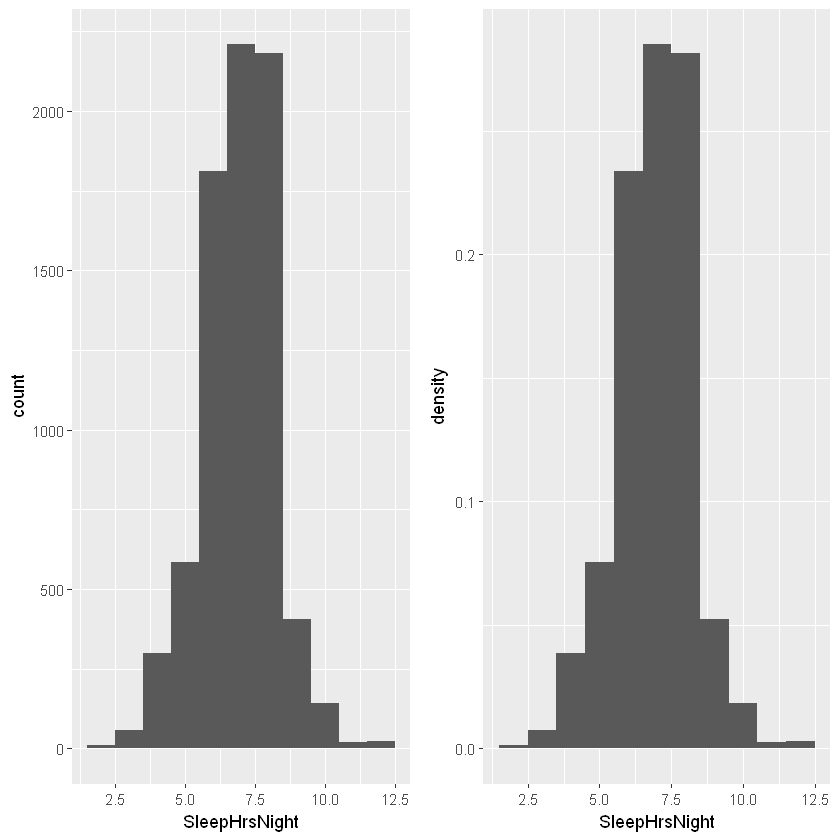

In [6]:
p1 <- ggplot(NHANES,aes(x=SleepHrsNight))+geom_histogram(binwidth=1)
p2 <- ggplot(NHANES,aes(x=SleepHrsNight,y=..density..))+geom_histogram(binwidth=1)
grid.arrange(p1,p2,ncol=2)

In [52]:
SleepHrsNight_cumulative <- 
  NHANES %>%
  drop_na(SleepHrsNight) %>%
  dplyr::select(SleepHrsNight) %>%
  group_by(SleepHrsNight) %>%
  summarize(AbsoluteFrequency = n()) %>%
  mutate(CumulativeFrequency = cumsum(AbsoluteFrequency))

SleepHrsNight_cumulative <- mutate(SleepHrsNight_cumulative, AbsolutePropotion = AbsoluteFrequency / sum(AbsoluteFrequency), CumulativePropotion = CumulativeFrequency / CumulativeFrequency[11])
pander(SleepHrsNight_cumulative)




-----------------------------------------------------------------------------
 SleepHrsNight   AbsoluteFrequency   CumulativeFrequency   AbsolutePropotion 
--------------- ------------------- --------------------- -------------------
       2                12                   12               0.001547389    

       3                59                   71               0.007607995    

       4                301                  372              0.038813669    

       5                586                  958              0.075564152    

       6               1811                 2769              0.233526757    

       7               2211                 4980              0.285106383    

       8               2183                 7163              0.281495809    

       9                406                 7569              0.052353320    

      10                142                 7711              0.018310767    

      11                21                  7732      

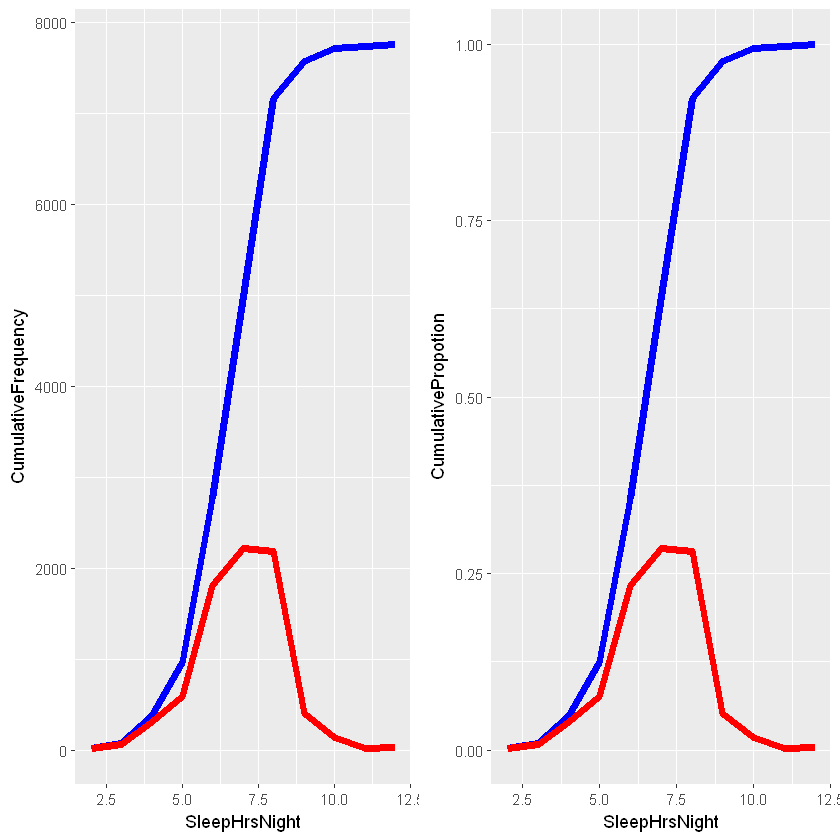

In [54]:
p1 <- ggplot(SleepHrsNight_cumulative,aes(x=SleepHrsNight,y=CumulativeFrequency))+geom_line(size=2,color="blue")
p1 <- p1 + geom_line(aes(x=SleepHrsNight,y=AbsoluteFrequency),size=2,color="red")
p2 <- ggplot(SleepHrsNight_cumulative,aes(x=SleepHrsNight,y=CumulativePropotion))+geom_line(size=2,color="blue")
p2 <- p2 + geom_line(aes(x=SleepHrsNight,y=AbsolutePropotion),size=2,color="red")
grid.arrange(p1,p2,ncol=2)

### 4.2.3 Plotting histograms

Warning message:
"Removed 353 rows containing non-finite values (stat_bin)."

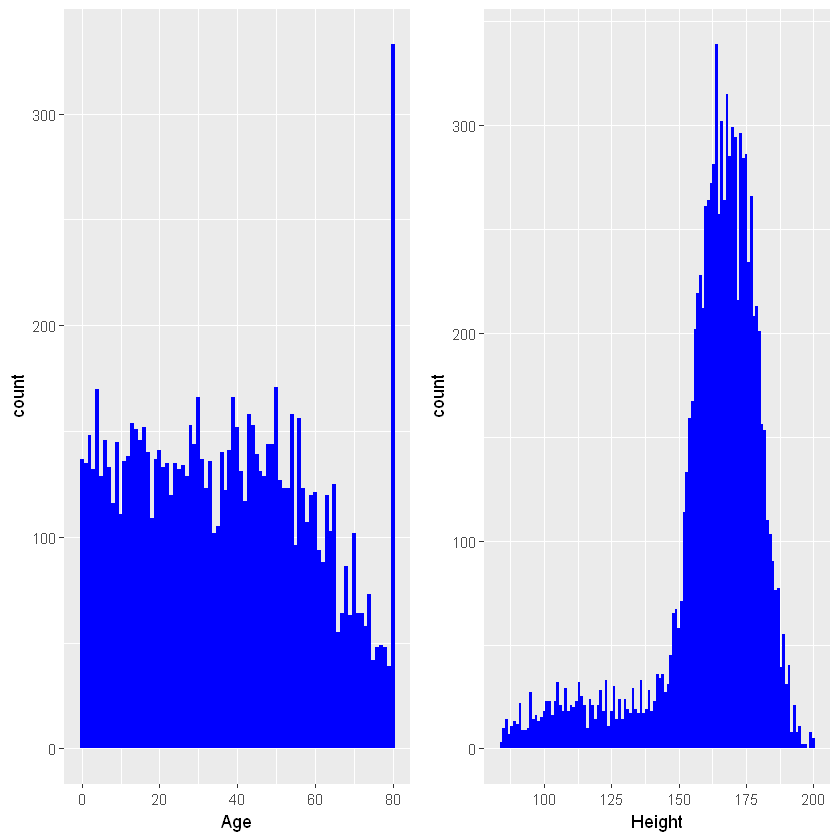

In [124]:
p1 <- ggplot(NHANES,aes(x=Age))+geom_histogram(binwidth=1,fill='blue')
p2 <- ggplot(NHANES,aes(x=Height))+geom_histogram(binwidth=1,fill='blue')
grid.arrange(p1,p2,ncol=2)

Warning message:
"Removed 353 rows containing non-finite values (stat_bin)."Warning message:
"Removed 53 rows containing non-finite values (stat_bin)."Warning message:
"Removed 53 rows containing non-finite values (stat_bin)."

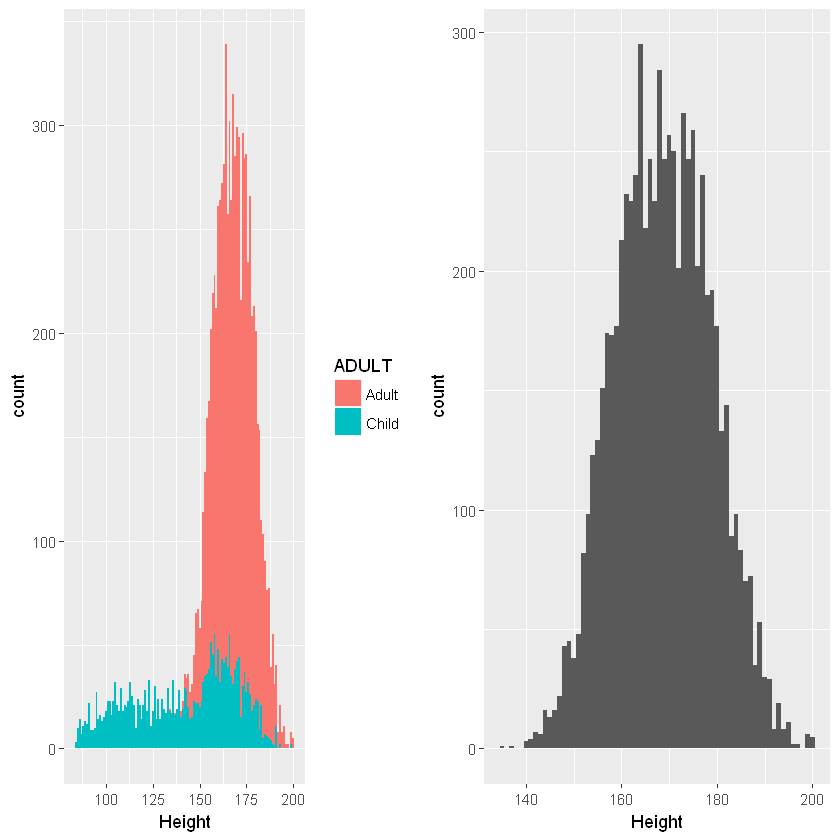

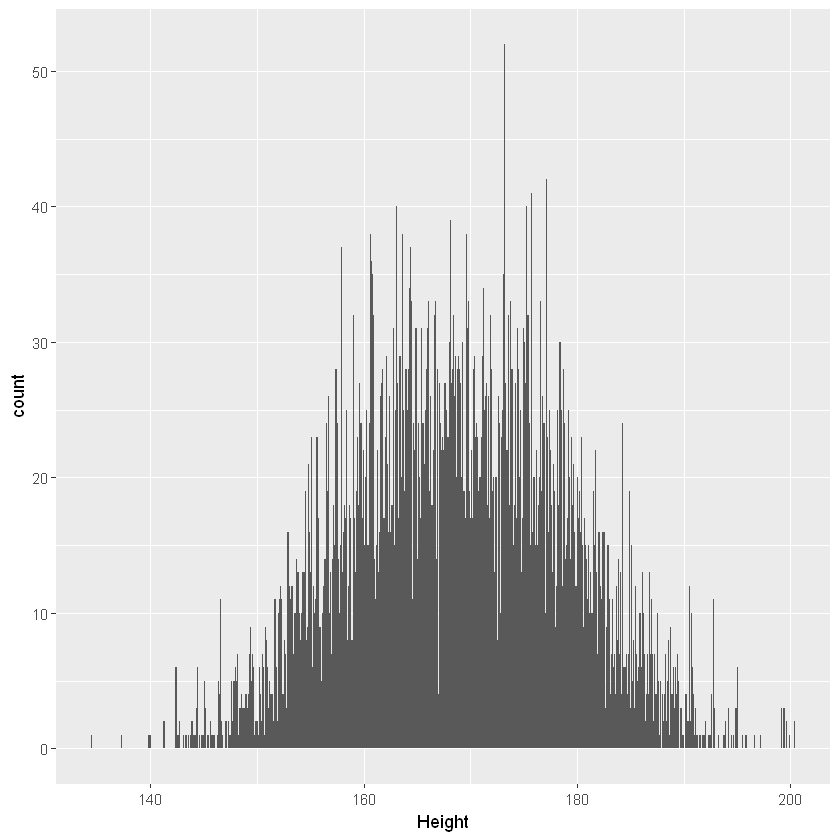

In [140]:
NHANES <- NHANES %>%
    mutate(ADULT = ifelse(Age>=20 , "Adult" , "Child"))
p1 <- ggplot(NHANES,aes(x=Height,fill=ADULT))+geom_histogram(binwidth=1)

NHANES_adult <- NHANES %>%
    filter(Age>=20)
p2 <- ggplot(NHANES_adult,aes(x=Height))+geom_histogram(binwidth=1)
grid.arrange(p1,p2,ncol=2)

p3 <- ggplot(NHANES_adult,aes(x=Height))+geom_histogram(binwidth=.1)
p3

### 4.2.4 Histogram bins

In [141]:
NHANES_adult %>%
  dplyr::select(Height) %>%
  slice(45:50) %>%
  pander()


--------
 Height 
--------
 149.7  

 149.7  

 164.4  

 164.4  

 164.4  

 154.3  
--------



$$
    number\hspace{2mm} of\hspace{2mm} bins = \frac{range\hspace{2mm} of\hspace{2mm} scores}{bin\hspace{2mm} width}
$$

## 4.3 Idealized representations of distributions


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 53 rows containing non-finite values (stat_bin)."Warning message:
"Removed 1 rows containing missing values (geom_bar)."`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 254 rows containing non-finite values (stat_bin)."Warning message:
"Removed 1 rows containing missing values (geom_bar)."

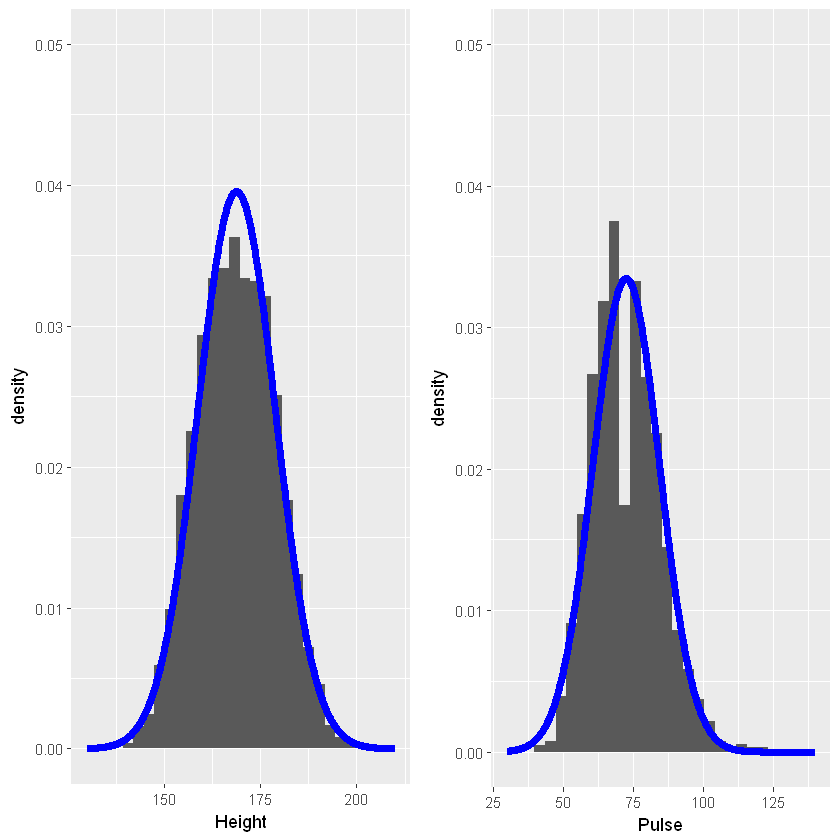

In [51]:
NHANES_adult <- NHANES %>%
    drop_na(Age) %>%
    filter(Age>=20)

HeightMeanAndSD<- NHANES_adult %>%
    drop_na(Height) %>%
    summarise(mean=mean(Height),sd=sd(Height))
x_height <-  seq(130, 210, length=1000)
fx_height <- dnorm(x=x_height,mean=as.numeric(HeightMeanAndSD["mean"]),sd = as.numeric(HeightMeanAndSD["sd"]))
Height_randum <-data.frame(x=x_height,y=fx_height)

PulseMeanAndSD<- NHANES_adult %>%
    drop_na(Pulse) %>%
    summarise(mean=mean(Pulse),sd=sd(Pulse))
x_pulse <-  seq(30, 140, length=1000)
fx_pulse <- dnorm(x=x_pulse,mean=as.numeric(PulseMeanAndSD["mean"]),sd = as.numeric(PulseMeanAndSD["sd"]))
Pulse_randum <-data.frame(x=x_pulse,y=fx_pulse)

p1 <- ggplot(NULL)
p1 <- p1 + geom_histogram(data = NHANES_adult, aes(x=Height,y=..density..))
p1 <- p1 + geom_line(data = Height_randum, aes(x,y),size=2,color="blue") + xlim(130,210) + ylim(0, 0.05)

p2 <- ggplot(NULL)
p2 <- p2 + geom_histogram(data = NHANES_adult, aes(x=Pulse,y=..density..))
p2 <- p2 + geom_line(data = Pulse_randum, aes(x,y),size=2,color="blue")+ xlim(30,140) + ylim(0, 0.05)

grid.arrange(p1,p2,ncol=2)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 53 rows containing non-finite values (stat_bin)."Warning message:
"Removed 53 rows containing non-finite values (stat_density)."Warning message:
"Removed 1 rows containing missing values (geom_bar)."`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 254 rows containing non-finite values (stat_bin)."Warning message:
"Removed 254 rows containing non-finite values (stat_density)."Warning message:
"Removed 1 rows containing missing values (geom_bar)."

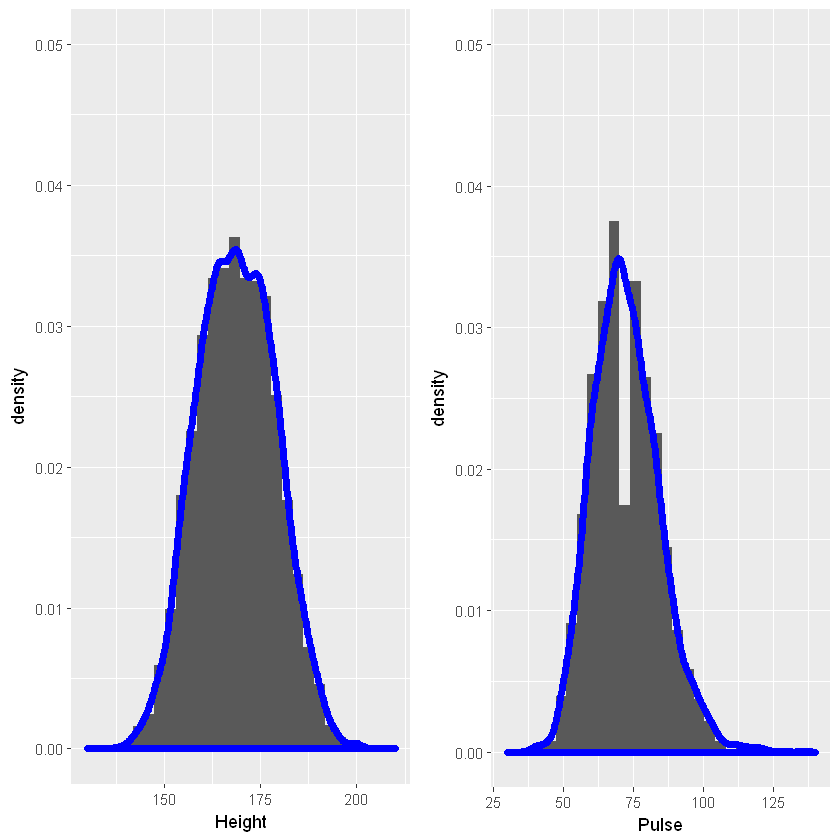

In [50]:
NHANES_adult <- NHANES %>%
    drop_na(Age) %>%
    filter(Age>=20)

p1 <- ggplot(data = NHANES_adult, aes(x=Height,y=..density..)) + geom_histogram() + geom_density(size=2,color="blue") + xlim(130,210) + ylim(0, 0.05)
p2 <- ggplot(data = NHANES_adult, aes(x=Pulse,y=..density..)) + geom_histogram() + geom_density(size=2,color="blue")+ xlim(30,140) + ylim(0, 0.05)
grid.arrange(p1,p2,ncol=2)

### 4.3.1 Skewness

### 4.3.2 Long-tailed distributions